In [14]:
import numpy as np 
import matplotlib.pyplot as plt 

from scipy.stats import norm

In [15]:
def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
    '''Generic Metropolis scheme.
    Parameters
    ---
    start : misc
        Initial guess.
    value : callable
        Function to calculate density (unnormalized) at given point.
    proposal : callable
        Function to get suggestion on a new point based on a current one.
    niter : int
        Number of iterations.
    nburn : int
        Number of initial samples to be skipped.
    kwargs : dict
        Keywords to be passed in value and proposal.

    Return
    ---
    post : list
        List of samples obtained.
    '''
    current = start
    post = [current]
    for i in range(niter):
        proposed = proposal(current, **kwargs)
        p = value(proposed, **kwargs) / value(current, **kwargs)
        if np.random.rand() < p:
            current = proposed
        post.append(current)
    return post[nburn:]

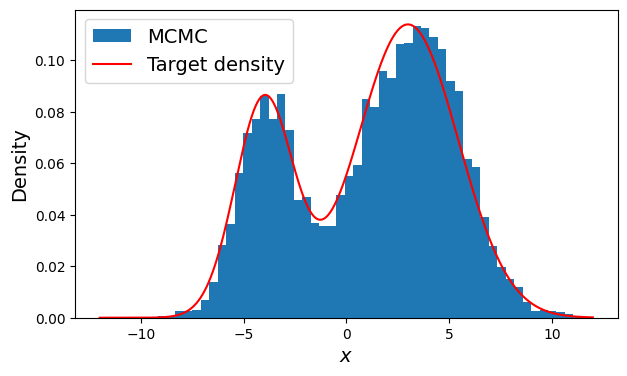

In [ ]:
x = np.linspace(-12, 12, 1000)

def mixture(x, **kwargs):
  _ = kwargs
  return 0.3*norm(-4, np.sqrt(2)).pdf(x) + 0.7*norm(3, np.sqrt(6)).pdf(x)

def proposal(current, sigma, **kwargs):
    _ = kwargs
    current = np.asarray(current)
    sigma = np.asarray(sigma)
    return current + sigma * np.random.randn(*current.shape)

post = metroplis(3, mixture, proposal, 10000, sigma=1)

plt.figure(figsize=(7, 4))
plt.hist(post[1000:], bins=50, density=True, label='MCMC posterior')
plt.plot(x, mixture(x), label='True posterior', c='r')
plt.legend(fontsize=14)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

En(ξ)= 23.523333333333333


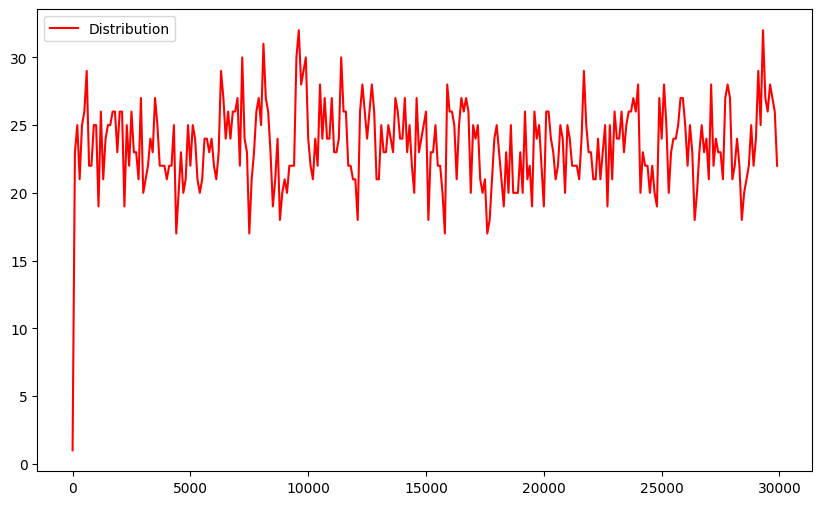

In [ ]:
def MCMC(graph, n):
    i = np.random.randint(0, n) 
    j = np.random.randint(0, n) 
    k = np.random.randint(0, 2)
    if graph[i][j]==0:
        if (i == 0 and graph[i+1][j]!=1) or (i == n-1 and graph[i-1][j]!=1) or (0 < i < n-1 and graph[i-1][j]!=1 and graph[i+1][j]!=1):
            if (j == 0 and graph[i][j+1]!=1) or (j == n-1 and graph[i][j-1]!=1) or (0 < j < n-1 and graph[i][j-1]!=1 and graph[i][j+1]!=1):
                if k:
                    graph[i][j] = 1
        '''if i==0: 
            if graph[i+1][j]!=1 and (graph[i][j+1]!=1 if j==0 else (graph[i][j-1]!=1 if j==n-1 else (graph[i][j-1]!=1 and graph[i][j+1]!=1))):
                if k: 
                    graph[i][j]=1 
        elif i==n-1: 
            if graph[i-1][j]!=1 and (graph[i][j+1]!=1 if j==0 else (graph[i][j-1]!=1 if j==n-1 else (graph[i][j-1]!=1 and graph[i][j+1]!=1))):
                if k:
                    graph[i][j]=1
        else: 
            if graph[i-1][j]!=1 and graph[i+1][j]!=1 and (graph[i][j+1]!=1 if j==0 else (graph[i][j-1]!=1 if j==n-1 else (graph[i][j-1]!=1 and graph[i][j+1]!=1))):
                if k:
                    graph[i][j]=1'''
    else:
        if k:
            graph[i][j]=0
    return graph 
 
n = 10
amount = 30000
graph = np.zeros((n, n))
n_ksi = np.vectorize(lambda _: np.sum(MCMC(graph, n)))(np.arange(amount))
 
print('En(ξ)=', np.sum(n_ksi[::100])/(amount/100))

fig = plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, amount, 100), n_ksi[::100], label='Distribution', c='r')
plt.legend()
plt.xticks()
plt.yticks()
plt.show()